##Custom Training Basics 

This example is designed to develop a basic understanding of building custom training loops

Starting with the underlying logic of fitting any model to a set of inputs and outputs.

The model will be training on the linear equation for a straing line `y = ax + b`

The linear equation will be implemented from scratch using gradient tape with the goal being to minimize the loss incurred by the model using linear regression

##Imports


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

##Define Model

The model is defined as a class

* `x` is the input tensor
* The model should output values of `ax + b` aka the predicted `y` value

Start by initializeing `a` and `b` to random values. During the training process, values of `a` and `b` get updated in accordance with linear regressionso as to minimize the loss incurred by the model.

Once the optimal values of `a` and `b` are achieved, the model should be able to correctly predict the values of `ax + b` given an `x` input tensor

* `a` and `b` are trainable weights of the model 
* `x` is the input tensor
* `y = ax + b` is the output

In [2]:
class Model(object):
  def __init__(self):
    # Initialize the weights to `2.0` and the bias to `1.0`
    # In practice, these should be initialize to random values (for example: using `tf.random.normal`)
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(1.0)

  def __call__(self, x):
    return self.w * x + self.b

model = Model()

##Define a loss function

A loss function measures how well the output of a model for a given input matches the target output. The goal is to minimize this difference during training.

Use the standard `L2 loss` also known as the least squared errors

In [3]:
def loss(predicted_y, true_y):
  return tf.reduce_mean(tf.square(predicted_y - true_y))

##Obtain training data 

Synthesize the training data by adding random gaussian (normal) noise to the inputs

In [4]:
TRUE_w = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

xs = tf.random.normal(shape=[NUM_EXAMPLES])

ys = (TRUE_w * xs) + TRUE_b

Visualize the loss value by plotting the model's predicitons in red and the training data in blue

In [5]:
def plot_data(inputs, outputs, predicted_outputs):
  real = plt.scatter(inputs, outputs, c='b')
  predicted = plt.scatter(inputs, predicted_outputs, c='r')

  plt.legend((real, predicted), ('Real Data', 'Predicted Data'))
  plt.show()

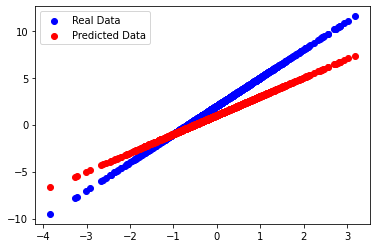

In [6]:
plot_data(xs, ys, model(xs))

##Define a training loop 

With the network and training data, train the model using gradient descent to update the trainable weights a and b to reduce the loss. 

There are many varients of the gradient descent scheme that are captured in tf.train.Optimizer 

However use basic math to demonstrate basic principles. Use tf.GradientTape() for automatic differentiation and tf.assign_sub for decrementing a value.

In [8]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)

  dw, db = t.gradient(current_loss, [model.w, model.b])

  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

  return current_loss

Repeatedly run through the training data to see how a and b evolve

In [9]:
model = Model()

#Collect the history of w-values and b-values to plot later 
list_w, list_b = [], []
epochs = range(15)
losses = []

for epoch in epochs: 
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())

  current_loss = train(model, xs, ys, learning_rate = 0.1)

  losses.append(current_loss)

  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=2.00 b=1.00, loss=2.05568
Epoch  1: w=2.21 b=1.20, loss=1.29730
Epoch  2: w=2.37 b=1.36, loss=0.81873
Epoch  3: w=2.50 b=1.49, loss=0.51672
Epoch  4: w=2.61 b=1.60, loss=0.32613
Epoch  5: w=2.69 b=1.68, loss=0.20585
Epoch  6: w=2.75 b=1.74, loss=0.12993
Epoch  7: w=2.80 b=1.80, loss=0.08202
Epoch  8: w=2.85 b=1.84, loss=0.05178
Epoch  9: w=2.88 b=1.87, loss=0.03269
Epoch 10: w=2.90 b=1.90, loss=0.02063
Epoch 11: w=2.92 b=1.92, loss=0.01303
Epoch 12: w=2.94 b=1.93, loss=0.00823
Epoch 13: w=2.95 b=1.95, loss=0.00519
Epoch 14: w=2.96 b=1.96, loss=0.00328


##Plots for evalutation

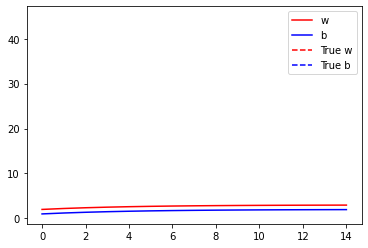

In [10]:
plt.plot(epochs, list_w, 'r',
         epochs, list_b, 'b')

plt.plot((TRUE_w) * len(epochs), 'r--',
         (TRUE_b) * len(epochs), 'b--')

plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

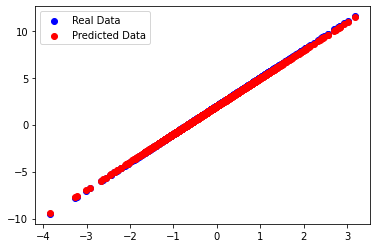

In [11]:
plot_data(xs, ys, model(xs))